<a href="https://colab.research.google.com/github/Romauld1990/PDA_SOL/blob/main/SAM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Самостоятельная работа 5

# Задание 1



# 1.1 Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as st
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Загружаем датасеты с google.disk**

In [3]:
df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/marketing_campaign.csv')

In [4]:
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/subscribers.csv')

In [5]:
df_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/users.csv')

**Изучаем колонки и определяем количество строк**

In [6]:
df_1.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


In [8]:
df_2.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   subscribing_channel  1856 non-null   object
 2   date_subscribed      1856 non-null   object
 3   date_canceled        577 non-null    object
 4   is_retained          1856 non-null   object
dtypes: object(5)
memory usage: 392.2+ KB


In [10]:
df_3.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   age_group           10037 non-null  object
 2   language_preferred  10037 non-null  object
dtypes: object(3)
memory usage: 235.4+ KB


**Объединяем загруженные ранее датасеты и выводим получившийся датасет df**

In [12]:
df = df_3.merge(df_1, on='user_id', how='left').merge(df_2, on='user_id', how='left')

In [13]:
df.head()

,user_id,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,0-18 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
1,a1001,19-24 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
2,a1002,24-30 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
3,a1003,30-36 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True
4,a1004,36-45 years,English,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True


# 1.2 Определить типы и статистики колонок

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   age_group            10037 non-null  object
 2   language_preferred   10037 non-null  object
 3   date_served          10021 non-null  object
 4   marketing_channel    10022 non-null  object
 5   variant              10037 non-null  object
 6   language_displayed   10037 non-null  object
 7   converted            10022 non-null  object
 8   subscribing_channel  1856 non-null   object
 9   date_subscribed      1856 non-null   object
 10  date_canceled        577 non-null    object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 1019.4+ KB


**Описание датафрейма**

Это объект типа pandas DataFrame с 10 037 строками и 12 столбцами. Вот краткое описание столбцов:

1. user_id: Уникальный идентификатор для каждого пользователя.
2. age_group: Категория возрастной группы для каждого пользователя.
3. language_preferred: Предпочитаемый язык для каждого пользователя.
4. date_served: Дата, когда маркетинговая кампания была показана пользователю.
5. marketing_channel: Канал, через который маркетинговая кампания была показана пользователю.
6. variant: Вариант маркетинговой кампании, показанный пользователю.
7. language_displayed: Отображаемый язык для маркетинговой кампании, показанной пользователю.
8. converted: Показывает, преобразовался ли пользователь или нет.
9. subscribing_channel: Канал, через который пользователь подписался.
10. date_subscribed: Дата подписки пользователя.
11. date_canceled: Дата отмены подписки пользователя.
12. is_retained: Показывает, удержан ли пользователь или нет.

In [15]:
df['age_group'].value_counts()

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [16]:
df['date_served'].value_counts()

1/15/18    789
1/2/18     417
1/16/18    391
1/3/18     388
1/1/18     375
1/17/18    374
1/31/18    347
1/10/18    342
1/4/18     336
1/27/18    331
1/5/18     331
1/30/18    330
1/28/18    330
1/29/18    328
1/20/18    321
1/18/18    320
1/8/18     319
1/6/18     315
1/9/18     315
1/11/18    314
1/14/18    309
1/13/18    308
1/19/18    308
1/12/18    306
1/7/18     281
1/21/18    234
1/26/18    225
1/24/18    193
1/25/18    186
1/22/18    182
1/23/18    176
Name: date_served, dtype: int64

In [17]:
df['language_preferred'].value_counts()

English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64

In [18]:
df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [19]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [20]:
df['language_displayed'].value_counts()

English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64

In [21]:
df['converted'].value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [22]:
df['subscribing_channel'].value_counts()

Instagram    600
Facebook     445
House Ads    354
Email        290
Push         167
Name: subscribing_channel, dtype: int64

In [23]:
df['date_subscribed'].value_counts()

1/16/18    163
1/17/18    141
1/15/18    104
1/5/18      81
1/2/18      77
1/3/18      70
1/10/18     69
1/9/18      68
1/7/18      66
1/4/18      65
1/6/18      65
1/8/18      65
1/18/18     63
1/1/18      63
1/14/18     56
1/11/18     56
1/13/18     55
1/12/18     52
1/25/18     42
1/24/18     42
1/30/18     39
1/23/18     39
1/28/18     38
1/22/18     37
1/27/18     37
1/29/18     37
1/21/18     36
1/26/18     35
1/20/18     34
1/19/18     31
1/31/18     30
Name: date_subscribed, dtype: int64

In [24]:
df['date_canceled'].value_counts()

4/2/18     15
4/1/18     14
1/11/18    13
3/4/18     12
3/3/18     11
           ..
2/1/18      1
1/31/18     1
1/5/18      1
2/15/18     1
1/18/18     1
Name: date_canceled, Length: 115, dtype: int64

In [25]:
df['is_retained'].value_counts()

True     1279
False     577
Name: is_retained, dtype: int64

# 1.3 Определить эффективность маркетинговых каналов по привлечению платящих игроков.

In [26]:
instagram_count = df[df['marketing_channel'] == 'Instagram']['marketing_channel'].count()
facebook_count = df[df['marketing_channel'] == 'Facebook']['marketing_channel'].count()
house_ads_count = df[df['marketing_channel'] == 'House Ads']['marketing_channel'].count()
email_count = df[df['marketing_channel'] == 'Email']['marketing_channel'].count()
push_count = df[df['marketing_channel'] == 'Push']['marketing_channel'].count()

instagram_subscribers_count = df[df['subscribing_channel'] == 'Instagram']['subscribing_channel'].nunique()
facebook_subscribers_count = df[df['subscribing_channel'] == 'Facebook']['subscribing_channel'].nunique()
house_ads_subscribers_count = df[df['subscribing_channel'] == 'House Ads']['subscribing_channel'].nunique()
email_subscribers_count = df[df['subscribing_channel'] == 'Email']['subscribing_channel'].nunique()
push_subscribers_count = df[df['subscribing_channel'] == 'Push']['subscribing_channel'].nunique()

instagram_conversion = (instagram_subscribers_count / instagram_count) * 100
facebook_conversion = (facebook_subscribers_count / facebook_count) * 100
house_ads_conversion = (house_ads_subscribers_count / house_ads_count) * 100
email_conversion = (email_subscribers_count / email_count) * 100
push_conversion = (push_subscribers_count / push_count) * 100

# Вывод результатов
print("Конверсия по каналу Instagram:")
print(instagram_conversion)
print("\nКонверсия по каналу Facebook:")
print(facebook_conversion)
print("\nКонверсия по каналу House Ads:")
print(house_ads_conversion)
print("\nКонверсия по каналу Email:")
print(email_conversion)
print("\nКонверсия по каналу Push:")
print(push_conversion)

Конверсия по каналу Instagram:
0.053447354355959376

Конверсия по каналу Facebook:
0.053763440860215055

Конверсия по каналу House Ads:
0.021128248468201986

Конверсия по каналу Email:
0.17699115044247787

Конверсия по каналу Push:
0.10070493454179255


# 1.4 Определить количество игроков в каждой возрастной группе.

In [27]:
# Группирование данных по age_group и подсчет количества user_id
age_group_count = df.groupby('age_group')['user_id'].nunique()

# Вывод результатов
print("Количество user_id в каждой age_group:")
print(age_group_count)


Количество user_id в каждой age_group:
age_group
0-18 years     1539
19-24 years    1682
24-30 years    1568
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: user_id, dtype: int64


# 1.5 Определить самую раннюю дату подписки на сервис.

In [28]:
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])

# Находим минимальную дату с помощью функции min() из модуля datetime
min_date = df['date_subscribed'].min()

# Выводим минимальную дату
print(min_date)

2018-01-01 00:00:00


# 1.6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).

In [29]:
# фильтруем только удержанных пользователей
retained_subscribers = df[df['is_retained'] == True]
# Разбиваем по группам оставшихся пользователей
retained_age_freq = retained_subscribers['age_group'].value_counts()
retained_lang_freq = retained_subscribers['language_preferred'].value_counts()
# Выводим результат
print(retained_age_freq)
print(retained_lang_freq)

19-24 years    326
24-30 years    273
0-18 years     229
30-36 years    122
45-55 years    119
36-45 years    115
55+ years       95
Name: age_group, dtype: int64
English    1179
German       44
Spanish      44
Arabic       12
Name: language_preferred, dtype: int64


# 1.7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [43]:
# расчет какое количество человек в каком варианте пришли
contnoldf = df[df['variant'] == 'control']
personaldf = df[df['variant'] == 'personalization']
con_conv = contnoldf['converted'].sum()
pers_conv = personaldf['converted'].sum()
print('Количество конвертированных пользователей при варианте control: ', con_conv, '\nКоличество конвертированных пользователей при варианте personalisation: ', pers_conv,)
# расчет конверсии
st, p_value = st.wilcoxon(con_conv, pers_conv)
print(f"Статистика теста: {st}")
print(f"P-значение: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Разница конверсии между вариантами статистически значима.")
else:
    print("Разница конверсии между вариантами не является статистически значимой.")

Количество конвертированных пользователей при варианте control:  371 
Количество конвертированных пользователей при варианте personalisation:  705
Статистика теста: 0.0
P-значение: 1.0
Разница конверсии между вариантами не является статистически значимой.


# Задание 2

# Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [57]:
from scipy.optimize import linprog
c = [-45, -80]
A = [[5, 20], [10, 15]]
b = [400, 450]
x_bounds = (0, None)
y_bounds = (0, None)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
print("Необходимо сделать стульев (x):", round(result.x[0]))
print("Необходимо сделать столов (y):", round(result.x[1]))
print("Максимальная прибыль:", round(-result.fun))


Необходимо сделать стульев (x): 24
Необходимо сделать столов (y): 14
Максимальная прибыль: 2200


# Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3 0.6$, day7 0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

a: 0.6003542276315728
b: 0.031111404959670533


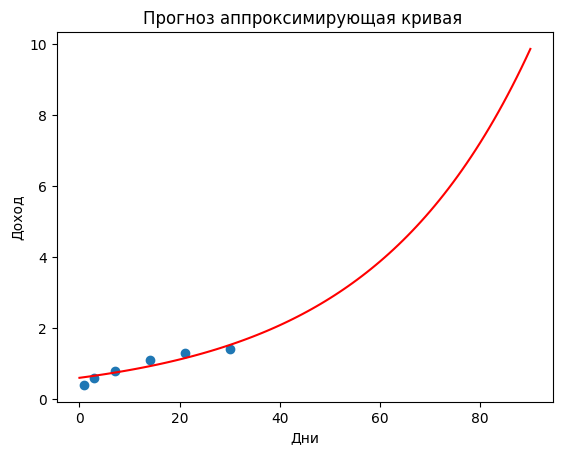

Прогноза на 90 день: 9.872874309173822


In [61]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные в виде списков
day = [1, 3, 7, 14, 21, 30]
income = [0.40, 0.60, 0.80, 1.10, 1.30, 1.40]

# Функция экспоненциального роста
def exponential(x, a, b):
    return a * np.exp(b * x)

# Функция для определения наиболее приближенной функции экспоненциального роста
def find_best_fit(x, y):
    popt, pcov = opt.curve_fit(exponential, x, y)
    return popt

# Вызываем функцию для определения наиболее приближенной функции экспоненциального роста
best_fit = find_best_fit(day, income)

# Выводим полученные коэффициенты
print('a:', best_fit[0])
print('b:', best_fit[1])

# Генерируем график с данными и наиболее приближенной функцией экспоненциального роста
plt.scatter(day, income)
x_values = np.linspace(0, 90, 100)
y_values = exponential(x_values, *best_fit)
plt.plot(x_values, y_values, color='red')
plt.title('Прогноз аппроксимирующая кривая ')
plt.xlabel('Дни')
plt.ylabel('Доход')
plt.show()

# Вычисляем прогнозу для 90 дня
prognoze = exponential(90, *best_fit)
print('Прогноза на 90 день:', prognoze)